<a href="https://colab.research.google.com/github/Nadiya-safeer11/mt-eval-sample/blob/main/run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧪 Machine Translation BLEU Score Evaluation in Colab

In [5]:
!pip install sacrebleu

In [6]:
reference_text = '''This is a test sentence.
The quick brown fox jumps over the lazy dog.'''

hypothesis_text = '''This is a test sentence.
The quick brown fox jumped over a lazy dog.'''

with open("reference.txt", "w", encoding="utf-8") as ref_file:
    ref_file.write(reference_text)

with open("hypothesis.txt", "w", encoding="utf-8") as hyp_file:
    hyp_file.write(hypothesis_text)

In [7]:
import sacrebleu

def compute_bleu(reference_file, hypothesis_file):
    with open(reference_file, 'r', encoding='utf-8') as ref_file:
        references = ref_file.readlines()

    with open(hypothesis_file, 'r', encoding='utf-8') as hyp_file:
        hypotheses = hyp_file.readlines()

    bleu = sacrebleu.corpus_bleu(hypotheses, [references])
    return bleu.score

score = compute_bleu("reference.txt", "hypothesis.txt")
print(f"BLEU Score: {score:.2f}")

BLEU Score: 61.80


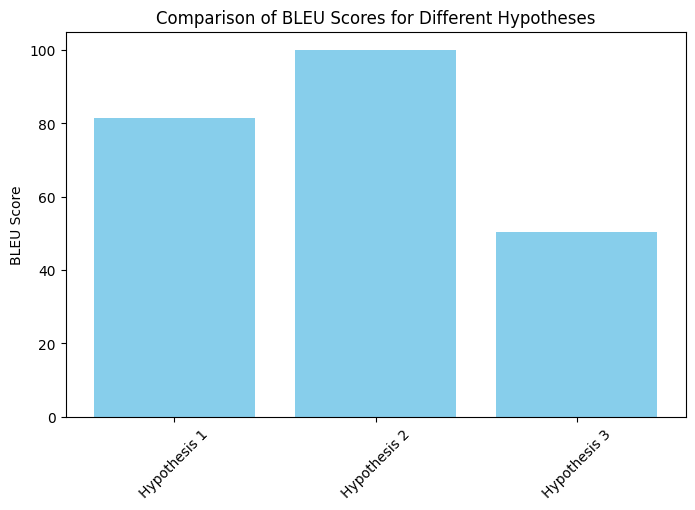

In [8]:
import matplotlib.pyplot as plt

# Define multiple hypotheses
hypotheses = [
    '''This is a test sentence.
    The quick brown fox jumped over the lazy dog.''',

    '''This is a test sentence.
    The quick brown fox jumps over the lazy dog.''',

    '''A test sentence is here.
    The quick brown fox leapt over the lazy dog.'''
]

# Define reference text (same as before)
reference_text = '''This is a test sentence.
The quick brown fox jumps over the lazy dog.'''

# Function to compute BLEU score for each hypothesis
def compute_bleu(reference_text, hypothesis_text):
    with open("reference.txt", "w", encoding="utf-8") as ref_file:
        ref_file.write(reference_text)

    with open("hypothesis.txt", "w", encoding="utf-8") as hyp_file:
        hyp_file.write(hypothesis_text)

    bleu = sacrebleu.corpus_bleu([hypothesis_text], [[reference_text]])
    return bleu.score

# Calculate BLEU scores for all hypotheses
bleu_scores = [compute_bleu(reference_text, hyp) for hyp in hypotheses]

# Plotting BLEU scores
plt.figure(figsize=(8, 5))
plt.bar(range(len(hypotheses)), bleu_scores, color='skyblue')
plt.xticks(range(len(hypotheses)), [f"Hypothesis {i+1}" for i in range(len(hypotheses))], rotation=45)
plt.ylabel('BLEU Score')
plt.title('Comparison of BLEU Scores for Different Hypotheses')
plt.show()


In [9]:
from IPython.display import display, HTML

# Display side-by-side comparison
def display_comparison(reference, hypothesis):
    comparison = f"""
    <table style="width:100%">
        <tr>
            <th>Reference</th>
            <th>Hypothesis</th>
        </tr>
        <tr>
            <td style="width:50%">{reference}</td>
            <td style="width:50%">{hypothesis}</td>
        </tr>
    </table>
    """
    display(HTML(comparison))

# Display comparison for each hypothesis
for i, hyp in enumerate(hypotheses):
    print(f"\nComparison for Hypothesis {i+1}:")
    display_comparison(reference_text, hyp)



Comparison for Hypothesis 1:


Reference,Hypothesis
This is a test sentence. The quick brown fox jumps over the lazy dog.,This is a test sentence. The quick brown fox jumped over the lazy dog.



Comparison for Hypothesis 2:


Reference,Hypothesis
This is a test sentence. The quick brown fox jumps over the lazy dog.,This is a test sentence. The quick brown fox jumps over the lazy dog.



Comparison for Hypothesis 3:


Reference,Hypothesis
This is a test sentence. The quick brown fox jumps over the lazy dog.,A test sentence is here. The quick brown fox leapt over the lazy dog.
